In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd gdrive/MyDrive/Colab Notebooks/project

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

import numpy as np
import torch
from torch import nn
import seaborn as sns
from sklearn.utils import shuffle
import random
import tensorflow as tf

print(tf.__version__)
print(sklearn.__version__)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# enhancing reproducability
np.random.seed(42)
random.seed(42)


## **Exploring Full English PCD csv data**




In [3]:
# F_pd is the dataframe with the Full English PCD csv data
F_pd = pd.read_csv('Full English PCD.csv', delimiter=',')  # Adjust delimiter if necessary

# Display the first few rows of the dataframe
#F_pd.head(10)
F_pd.sample(10)

,Unnamed: 0,Verse,Meter,char_count
2285,2317,o haste to me while o'er thy way she strews th...,iambic,6
160162,162887,then sated hunger bids his brother thirst,iambic,6
76517,77480,and half our judges are our rivals too,iambic,6
21660,21772,the diff'rent qualities of things were found,iambic,6
176560,179291,fain wou'd ye to the sheltering hive allure,iambic,6
104829,106616,ye sighs that minute the slow wasting day,iambic,6
142676,145390,o'er the soft sky of sweetest blue,iambic,6
154469,157192,and farther from their wishes than before,iambic,6
64764,65600,the youthful god with spangled hair,iambic,6
115599,117821,partake thy sorrows or restore thy peace,iambic,6


Shape : (199002, 4)
            Unnamed: 0   Verse  char_count
Meter                                     
anapaestic        5378    5378        5378
dactyl            1397    1397        1397
iambic          186809  186809      186809
trochaic          5418    5418        5418


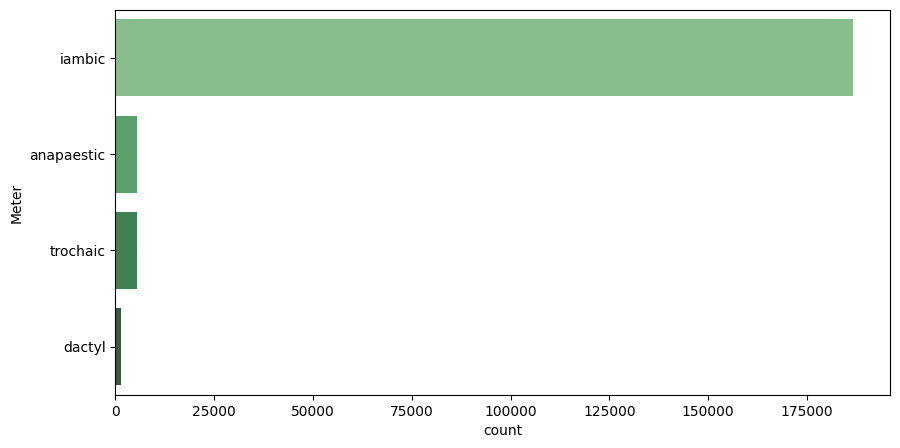

In [ ]:
print("Shape :", F_pd.shape)
print(F_pd.groupby('Meter').count())
fig, axs = plt.subplots(figsize=(10,5))
sns.countplot(y="Meter", data=F_pd, palette="Greens_d",ax=axs);

## **Down sampling the Full English PCD data**.

      Using the provided Down-sampled English PCD dataset from Kaggle.
        
        Shape : (17743, 3)
        Meter                        
        anapaestic   5378  
        dactyl       1397  
        iambic       5550   
        trochaic     5418  

### Exploring Down-sampled English PCD.csv

In [ ]:
# D_pd is the dataframe with the Down sampled English PCD csv data

D_pd = pd.read_csv('Down-sampled English PCD.csv', delimiter=',')  # Adjust delimiter if necessary

# Display the first few rows of the dataframe
D_pd.sample(10)

,Unnamed: 0,Verse,Meter,char_count
476,16753,though feeble in degree in kind the same,iambic,6
8487,57200,roil on thou fair orb and with gladness pursue,anapaestic,10
10740,74396,he had sigh'd and protested had kneel'd and im...,anapaestic,10
11078,81594,d'arcy lives and i inspire,trochaic,8
2405,115449,why not prevent them when they're such again,iambic,6
3077,178993,effects and causes were not understood,iambic,6
2141,20964,his fate he merits as to rebels due,iambic,6
10885,78273,death o'ertakes the dreadful foe,trochaic,8
10632,70009,for as yet the rude catch from the briar may b...,anapaestic,10
9209,68169,dares the fleecy garb deride,trochaic,8


In [ ]:
# Drop redundant column
D_pd.drop(columns= ['Unnamed: 0'], inplace=True) # we will drop the 'Unnamed: 0' column

In [ ]:
print("Duplicated Verse: ", D_pd['Verse'].duplicated().sum())
print("Is nan: ", D_pd.isna().values.any())
print("Unique meter: ",np.unique(D_pd['Meter']))

Duplicated Verse:  0
Is nan:  False
Unique meter:  ['anapaestic' 'dactyl' 'iambic' 'trochaic']


Shape : (17743, 3)
            Verse  char_count
Meter                        
anapaestic   5378        5378
dactyl       1397        1397
iambic       5550        5550
trochaic     5418        5418


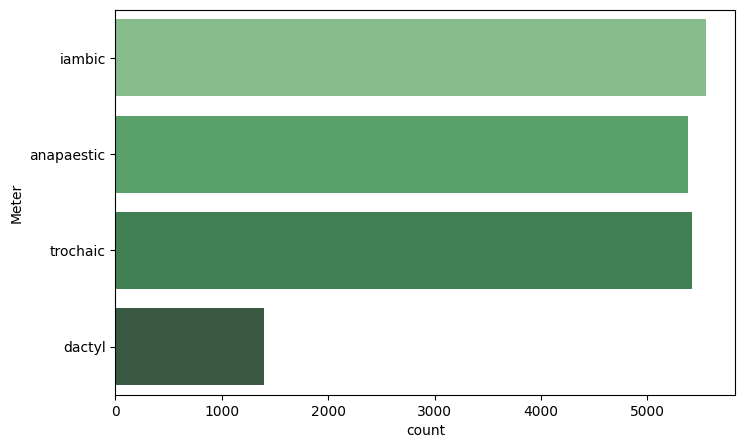

In [ ]:
#plot size of every meter
print("Shape :", D_pd.shape)
print(D_pd.groupby('Meter').count())
fig, axs = plt.subplots(figsize=(8,5))
sns.countplot(y="Meter", data=D_pd, palette="Greens_d",ax=axs);

### Experimenting with Resampling

Eventual this was abandoned due to a too small dataset.

In [ ]:
pip install imbalanced-learn

In [ ]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# Assuming df is your DataFrame with columns 'features' and 'class_label'
df = D_pd

# Setting the desired distribution
target_distribution = {'dactyl': 1390, 'iambic': 1390, 'anapaestic': 1390, 'trochaic': 1390}
# Initialize RandomUnderSampler with the target distribution
rus = RandomUnderSampler(sampling_strategy=target_distribution, random_state=42)

# Assuming 'Meter' is your class label and 'Verse' (or any other feature) is your feature column
X = df['Verse'].values.reshape(-1, 1)  # Reshape is necessary as it expects a 2D array
y = df['Meter']

# Perform the downsampling
X_res, y_res = rus.fit_resample(X, y)

# Create a new DataFrame with the downsampled data
df_resampled = pd.DataFrame(data=X_res, columns=['Verse'])
df_resampled['Meter'] = y_res

# Now df_resampled is your balanced dataset


In [ ]:
df_resampled.sample(10)

,Verse,Meter
906,on the beach as she stood when the wild waves ...,anapaestic
1475,sounded the wooden latch and the door swung ba...,dactyl
2757,cheerily neighed the steeds with dew on their ...,dactyl
377,no pedant yet learned nor rakehelly gay,anapaestic
1501,raising his reverend hand with a gesture he aw...,dactyl
1103,o cambridge attend,anapaestic
5025,andamongthemhiawatha,trochaic
4731,letmepassmywaykenabeek,trochaic
803,be the maidens all virtuous who drink of thy tide,anapaestic
1845,into whose sea of flowers the sun was slowly d...,dactyl


Shape : (5560, 2)
            Verse
Meter            
anapaestic   1390
dactyl       1390
iambic       1390
trochaic     1390


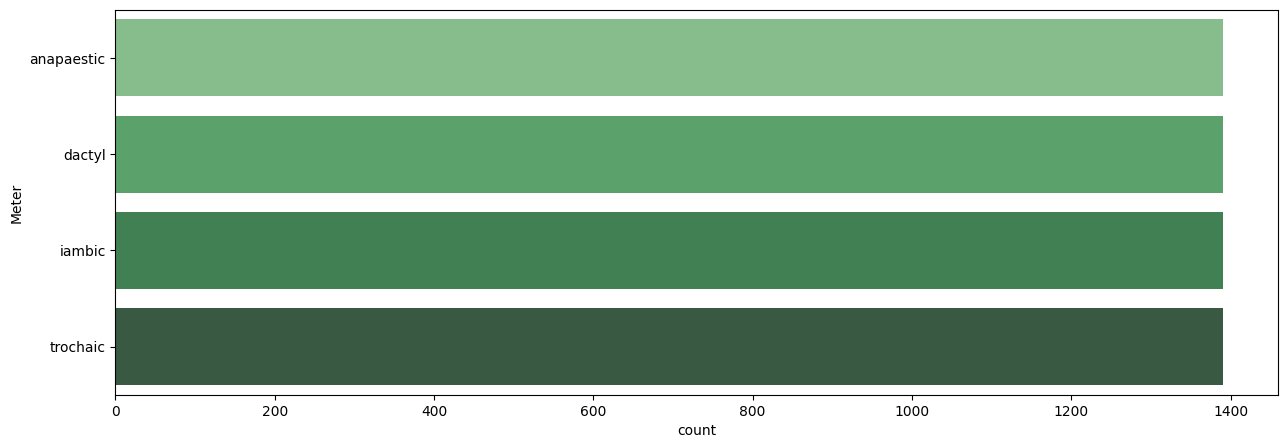

In [ ]:
#plot size of every meter
print("Shape :", df_resampled.shape)
print(df_resampled.groupby('Meter').count())
fig, axs = plt.subplots(figsize=(15,5))
sns.countplot(y="Meter", data=df_resampled, palette="Greens_d",ax=axs);

### Understanding the meaning of char_count column in the dataset

The column char_count is difficult to interpret.
Making a new_count of the char and the words in order to inspect the dataset.



In [ ]:
np.unique(D_pd['char_count'])

array([ 6,  8, 10])

In [ ]:
# char_count is dificult to understand from the dataset.

#count characters per verse
D_pd['new_char_count'] = [len(str(line)) for line in D_pd['Verse']]

In [ ]:
D_pd.head()


,Verse,Meter,char_count,new_char_count
0,names of no mark or price of them not one,iambic,6,41
1,'forbear my son' the hermit cries,iambic,6,33
2,what conjur'd awe upon the people steals,iambic,6,40
3,the lover in the husband may be lost,iambic,6,36
4,among the nicest of mankind,iambic,6,27


In [ ]:
sns.set_theme(style="darkgrid")

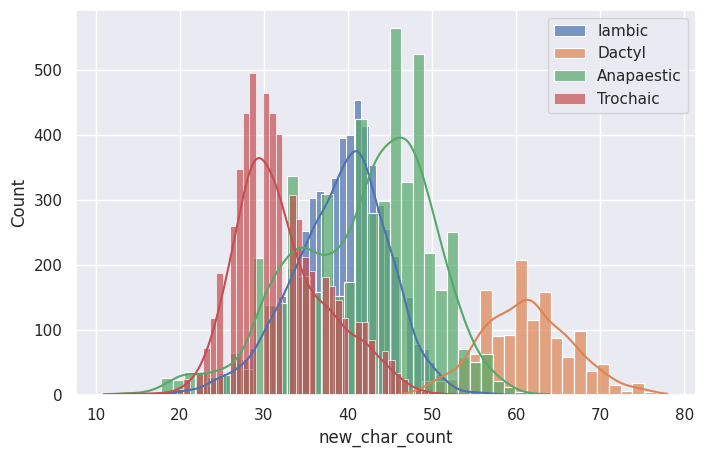

In [ ]:
# the distribution of the new_char_count per meter
# see also https://github.com/hci-lab/LearningMetersPoems/

# column names ['anapaestic', 'dactyl', 'iambic', 'trochaic']

#get all Iambic poems
Iambic_pd = D_pd.groupby('Meter').get_group('iambic')['new_char_count']
#get all Dactyl poems
Dactyl_pd = D_pd.groupby('Meter').get_group('dactyl')['new_char_count']
#get all Imbic poems
Anapaestic_pd = D_pd.groupby('Meter').get_group('anapaestic')['new_char_count']
#get all Dactyl poems
Trochaic_pd = D_pd.groupby('Meter').get_group('trochaic')['new_char_count']

sns.set_theme(style="darkgrid")
# Plot the histograms with specific colors and transparency
fig, axs = plt.subplots(figsize=(8, 5))

sns.histplot(Iambic_pd, kde=True, label="Iambic",  ax=axs, alpha=0.7)
sns.histplot(Dactyl_pd, kde=True, label="Dactyl", ax=axs, alpha=0.7)
sns.histplot(Anapaestic_pd, kde=True, label="Anapaestic", ax=axs, alpha=0.7)
sns.histplot(Trochaic_pd, kde=True, label="Trochaic", ax=axs, alpha=0.7)

plt.legend()
plt.show()


In [ ]:
D_pd['word_count'] = D_pd['Verse'].apply(lambda x: len(str(x).split()))

In [ ]:
D_pd.head()

,Verse,Meter,char_count,new_char_count,word_count
0,names of no mark or price of them not one,iambic,6,41,10
1,'forbear my son' the hermit cries,iambic,6,33,6
2,what conjur'd awe upon the people steals,iambic,6,40,7
3,the lover in the husband may be lost,iambic,6,36,8
4,among the nicest of mankind,iambic,6,27,5


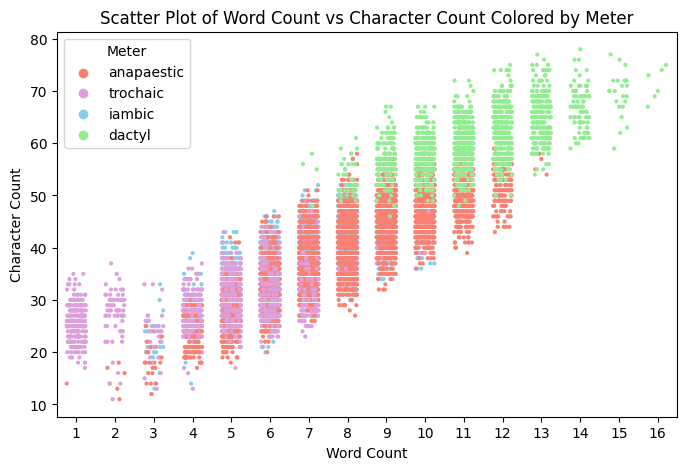

In [ ]:

# color palette
palette = {"iambic": "skyblue", "dactyl": "lightgreen", "anapaestic": "salmon", "trochaic": "plum"}

# Create the scatter plot
plt.figure(figsize=(8, 5))
# Create the strip plot
sns.stripplot(data=D_pd, x='word_count', y='new_char_count', hue='Meter',
              palette=palette, size=3, jitter=0.25)  # Adjust size and jitter as needed

# Adding labels and title for clarity
plt.xlabel('Word Count')
plt.ylabel('Character Count')
plt.title('Scatter Plot of Word Count vs Character Count Colored by Meter')
plt.legend(title='Meter')

plt.show()


scansion## Experimenting with differrent approaches found in the literature



> We found differrent approaches with available code to measure the pattern of stress in a verse.


*   The first is prosodic
*   The second is pronouncing
*   The third is scansion
*   The fourth is erato


## **Experimenting with tokenizers**

Translating a verse to a stressed string with



*   Prosodic
*   Pronouncing
*   Scansion
*   Erato



### Prosodic

In [ ]:
# install espeak to pronounce unknown words
!apt-get -qq install espeak > /dev/null

# check espeak installed
!which espeak

/usr/bin/espeak


In [ ]:
# install prosodic
!pip install -qU prosodic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.7 MB/s eta 0:00:00


In [ ]:
# import prosodic
import prosodic as p

In [ ]:
verses = D_pd['Verse']

print(verses.shape)

(17743,)


In [ ]:
# extracted from the codebase for our use
meter_name = 'iambic_pentameter'
meter = p.get_meter(meter_name)

def meter_out(text):
    parse = text.bestParse()

    return parse.str_meter()


def get_stresses(verse_line):
    verse_str = ''+verse_line+''
    stress_pattern = p.Text(verse_str)
    stress_pattern.parse(meter=meter)
    for line in stress_pattern.lines():

      return meter_out(line)

In [ ]:
get_stresses("the lover in the husband may be lost")


000001	the                 	P:ðə                               	S:U	W:L
000002	lover               	P:'lə.vɛː                          	S:PU	W:LH
000003	in                  	P:ɪn                               	S:U	W:L
000004	the                 	P:ðə                               	S:U	W:L
000005	husband             	P:'həz.bʌnd                        	S:PU	W:HH
000006	may                 	P:meɪ                              	S:U	W:L
000007	be                  	P:'biː                             	S:P	W:H
000008	lost                	P:'lɔːst                           	S:P	W:H
text                                                        	parse                                                       	meter	num_parses	num_viols	score_viols	[*footmin-f-resolution]	[*footmin-w-resolution]	[*headedness!=rising]	[*number_feet!=5]	[*strength.w=>-p]
the lover in the husband may be lost                        	the|LO|ver|IN|the|HUS|band|MAY|be|LOST                      	wswswswsws	1	0	0	0	0	0	0	0


>>

'wswswswsws'

In [ ]:
# testing on the small dataset as a proof of concept
df_resampled['Stressed_Verse'] = df_resampled['Verse'].apply(lambda x: get_stresses(f"'{x}'"))
# takes 7 min on V100

Streaming output truncated to the last 5000 lines.
' wasthememoryofmama'                                       	WAST|he|ME|mo|RYO|fma|M|a                                   	swswswsw	2	2	2	1	1	0	0	0


>> parsing complete in: 0.00661778450012207 seconds
000001	can                 	P:kæn                              	S:U	W:L
000002	buy                 	P:'baɪ                             	S:P	W:L
000003	ev'n                	P:'ɛvəːn                           	S:P	W:H
000004	empire              	P:'ɛm.paɪ.ɛː                       	S:PUU	W:HLH
000005	and                 	P:ænd                              	S:U	W:L
000006	to                  	P:tuː                              	S:U	W:L
000007	julius              	P:'ʤuːl.jəs                        	S:PU	W:HH
000008	gave                	P:'ɡeɪv                            	S:P	W:H
text                                                        	parse                                                       	meter	num_parses	num_viols	score_viols	[*foo

In [ ]:
df_resampled.sample(10)

,Verse,Meter,Stressed_Verse
4604,when from salem's gates he drove,trochaic,wwswsws
3433,their fleeting nature would endure,iambic,wswswsws
2398,group after group appeared and joined or passe...,dactyl,wswswswswswwsw
2369,wildly and sweet and far through the still dam...,dactyl,swswswswswswwsw
2806,that corfe and kingston gentry think you mad,iambic,wswswswsws
3390,most easily dispense,iambic,wswsws
2392,hung their ladder of ropes aloft like the ladd...,dactyl,swsswswswwsswsw
4903,lo heav'n descends thy festivals to share,trochaic,wswswswsws
3596,with friendship's generous love,iambic,wswswsw
2487,day with its burden and heat had departed and ...,dactyl,wswswswswswswswsw


In [ ]:
# Saving the file local so we can start from here and skip the former steps
# it also guarantees that we start always with the same set
# Define the file path for saving the DataFrame
file_path = 'df_resampled.csv'

# Using 'with open' to write the DataFrame to a CSV file
with open(file_path, 'w', encoding='utf-8') as file:
    df_resampled.to_csv(file, index=False)  # index=False to avoid writing row indices to the file

### Repeating the same proces as above now on the full Down sampled dataset

After experimenting with the tokenizers Prosodic was used.

The full Down sampled dataset was processed and saved for future use.

In [ ]:
D_pd['Stressed_Verse'] = D_pd['Verse'].apply(lambda x: get_stresses(f"'{x}'"))
# takes 40 min on V100

In [ ]:
#Saving
# Define the file path for saving the DataFrame
file_path = 'D_pd.csv'

# Using 'with open' to write the DataFrame to a CSV file
with open(file_path, 'w', encoding='utf-8') as file:
    D_pd.to_csv(file, index=False)  # index=False to avoid writing row indices to the file

### Pronouncing

In [ ]:
!pip install pronouncing

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 6.2 MB/s eta 0:00:00
  Created wheel for pronouncing: filename=pronouncing-0.2.0-py2.py3-none-any.whl size=6234 sha256=702e0cf97afaa4de93c90eb14262c2554d429f940b79338921eae7156deaf2ad
  Stored in directory: /root/.cache/pip/wheels/05/f6/1d/599c67da1fa48c086d8c49e8fc6bd5f05bc9fa66fb04bed5db
Successfully built pronouncing


In [ ]:
import pronouncing as pr
import sys

f = sys.argv[1]

def find_stress(line):
    stresslist = []
    words = line.split()
    for word in words:
        word = word.strip('",.?!;:').lower()
        s = pr.stresses_for_word(word)
        if any(x == '0' for x in s):
            stresslist.append('0')
        elif len(s) != 0:
            stresslist.append(s[0])
    stress = ''.join(stresslist)
    return stress

l = "Shall I compare thee to a summer's day?"

def name_meter(stress):
    stressed_syllables = [i for i,s in enumerate(stress) if s == '1']
    return stressed_syllables



In [ ]:
print(find_stress("for an unthankful office a dignified toil"))
print(name_meter(find_stress("for an unthankful office a dignified toil")))

001001021
[2, 5, 8]


In [ ]:
# Apply the find_stress(line) by pronouncing library function to each row in the 'Verse' column
D_pd['find_stress_pronouncing'] = D_pd['Verse'].apply(find_stress)


In [ ]:
D_pd.sample(20)


,Verse,Meter,char_count,new_char_count,word_count,Stressed_Verse,find_stress_pronouncing
6815,i often heard say that st patrick took care,anapaestic,10,43,9,wswswswswsw,11011011011
754,celestial fires descending on my breast,iambic,6,39,6,wswsswswsws,01010010111
17177,crept away to die in the almshouse home of the...,dactyl,6,55,11,swswswwswswwsw,101010011010
5806,she saw the poor shepherd's despair,anapaestic,10,35,6,swswssws,11011001
3757,a still solemnity all nature kept,iambic,6,33,6,wswswswsws,0101001101
6456,who by dint of mere humour had kept her alive,anapaestic,10,45,10,wswswswswsws,111111011001
15180,unaware of the world and the time to have passed,anapaestic,10,48,10,swswwswwswsw,201101001011
11938,with her wit she engages the free,anapaestic,10,33,7,wswswswsw,001101001
10983,each such power as fate had lent,trochaic,8,32,7,wswswsw,11101111
8404,be full ye courts be great who will,trochaic,8,35,8,wswswsws,01110110


### Scancion

In [ ]:
import nltk
nltk.download('cmudict')


[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


True

In [ ]:

import nltk

from nltk.corpus import cmudict
from nltk.corpus import stopwords
import sys, glob, codecs
import Levenshtein as lev
from collections import defaultdict

In [ ]:
#!/usr/bin/env python

#----------------#
# All lines in EEBO: ./scansion.py ../../data/eebo_tcp_MARCH_2015/just_lines/
#----------------#



i = sys.argv[1]
output = sys.argv[2]
prondict = cmudict.dict()
cmuwords= cmudict.words()

def just_stress(word): #Find a word in cmudict and return the numerical stresses for that word
	prons = prondict[word]
	stress=[]
	if len(prons) > 1: #For one-syllable words, prefer a 0 over a 1 (if one of prondict's options is a 0)
		possibles=[]
		for s in prons:
			possible_stress=''.join([''.join([char for char in syllable if char.isdigit()]) for syllable in s])
			possibles.append(possible_stress)
		if len(possibles[0]) == 1:
			if any(l == '0' for l in possibles):
				stress.append('0')
			else:
				stress.append('1')
		else:
			stress.extend(possibles[0])
	else:
		for syllable in prons[0]:
			for char in syllable:
				if char.isdigit():
					stress.append(char)
	stress=''.join(stress)
	return stress

def find_word(word): #Deal with words not in prondict
	distances={v: lev.distance(word, v) for v in cmuwords}
	best_match=min(distances, key=distances.get)
	return just_stress(best_match)

def stressByLine(line): #Return the stress pattern for a line of poetry, using the above prondict lookup
	line_stress=''
	words=line.split()
	words=[w.lower().strip('-,.?!:"').replace("'d", "ed") for w in words]
	for word in words:
		if word in prondict:
			ws = just_stress(word)
			line_stress=line_stress+ws
		elif '--' in word: #Attempt at fixing the problem with dashes, not fully solved
			dehyphenated=word.split('--')
			for w in dehyphenated:
				w=w.strip(',.?!:"')
				if w in prondict:
					ws = just_stress(w)
					line_stress=line_stress+ws
				else:
					ws = find_word(word)
					line_stress=line_stress+ws
		elif '-' in word: #If a word is hyphenated, look for its components separately
			dehyphenated=word.split('-')
			for w in dehyphenated:
				if w in prondict:
					ws = just_stress(w)
					line_stress=line_stress+ws
				else:
					ws = find_word(word)
					line_stress=line_stress+ws
		else: #If the word is unknown, look up the most similar word in prondict
			ws = find_word(word)
			line_stress=line_stress+ws


	return line_stress

def test_iambic_lines(poem): #Test for iambic pentameter specifically
	results=[]
	for line in poem:
		line_result=[]
		line_result.append(line.strip('\n'))
		stress=str(stressByLine(line))
		line_result.append(stress)
		if len(stress) >= 9 and len(stress) <= 11 and lev.distance('0101010101',stress) <= 4: #Tests meter at the level of the line, but 5 is a very low threshold for matching.
			line_result.append('MATCH')
		else:
			line_result.append('OUCH')
		results.append(line_result)
	return results


def find_meter(meterResults): #A quick way of finding the dominant metrical form in any group of lines (without a bias toward existing verse forms, as above).
	meter_dict={}
	for v in meterResults:
		if isinstance(v, str):
			if v not in meter_dict:
				meter_dict[v] = 1
			else:
				meter_dict[v] += 1
		else:
			v = tuple(v)
			if v not in meter_dict:
				meter_dict[v] = 1
			else:
				meter_dict[v] += 1
	#return meter_dict
	m = max(meter_dict, key=meter_dict.get)
	return 'I think this poem is in ' + m + '.\n\n' + 'Based on this list: ' + str(meter_dict)



def name_meter(stress):
	if stress == '':
		return ''

	else:
		feet = {}
		length = {}
		feet['iambic'] = 0
		feet['trochaic'] = 0
		feet['anapestic'] = 0
		feet['dactylic'] = 0
		length[1] = 'monometer'
		length[2] = 'dimeter'
		length[3] = 'trimeter'
		length[4] = 'tetrameter'
		length[5] = 'pentameter'
		length[6] = 'hexameter'
		length[7] = 'heptameter'
		length[8] = 'octameter'
		length[9] = 'enneameter'
		for i,s in enumerate(stress):
			z = i+1
			if i > 2 and s == '0' and z % 3 == 0 and stress[i-1] == '0' and stress[i-2] == '1':
				feet['dactylic'] += 1

			elif i > 2 and s == '1' and z % 3 == 0 and stress[i-1] == '0' and stress[i-2] == '0':
				feet['anapestic'] += 1

			elif i < len(stress)-1 and i % 2 == 0 and s == '0' and stress[i+1] == '1':
				feet['iambic'] += 1

			elif i < len(stress)-1 and i % 2 == 0 and s == '1' and stress[i+1] == '0':
				feet['trochaic'] += 1



		highest = max(feet.values())

		bestFeet = [k for k,v in feet.items() if v == highest]

		names = []
		for bf in bestFeet:
			if bf == 'iambic' or bf == 'trochaic':
				numberOfFeet = len(stress) / 2

			elif bf == 'anapestic' or bf == 'dactylic':
				numberOfFeet = len(stress) / 3

			try:
				names.append(bf + ' ' + length[numberOfFeet])
			except KeyError:
				names.append('Unknown: probably too many syllables')


		if len(names) == 1:
			return names[0]

		elif len(names) == 4:
			return "Unsure of metrical foot (Spondaic!)"

		else:
			orNames =[]
			for n in names:
				orNames.append(n)

			return orNames




In [ ]:
# Apply the stressByLine function to each row in the 'Verse' column
# https://github.com/jrladd/scansion based on pronouncing
D_pd['stress_scancion'] = D_pd['Verse'].apply(stressByLine)


In [ ]:
name_meter('1101110101')

'iambic pentameter'

In [ ]:
D_pd.sample(10)

,Verse,Meter,char_count,new_char_count,word_count,Stressed_Verse,find_stress_pronouncing,stress_scancion,stress_erato,syllapy
8873,gaily spreads her saffron robe,trochaic,8,30,5,swswsws,1010101,1010101,+-+-+-+,7
15935,black were her eyes as the berry that grows on...,dactyl,6,71,15,wswswwswswswswwsw,11011010011011012,10011010011011012,+--++-+-+++-++-++,18
5185,dig for the whither'd herb thro' heaps of snow,iambic,6,46,9,wswswswsws,1001111,1001011101,++--+-+++,10
7267,give the vacant hours to peace,trochaic,8,30,6,swswswsw,10101001,10101001,+-+-+-++,8
16174,when his neighbors complained that any injusti...,dactyl,6,62,10,wwsswswsswsswsw,101001010210010,101001010010010,+++--+++--+-+++,18
10508,of alfred founder of the british state,trochaic,8,38,7,wswswswsws,1101010101,0101000101,++-+-+-+-+,10
9609,thus genoa's petty state outbalances,trochaic,8,36,5,swswswswssw,1121,11101100,+-+-+-,11
1252,and little eelets soon begin to creep,iambic,6,37,7,wswswswsws,01010101,0101010101,-+--+-+++,10
13425,the passion that faithful as hopeless will be,anapaestic,10,45,8,wswswswswsw,01001011000,01001011000,-+-++-++-++,11
4455,shall chance receive where sweet contentment d...,iambic,6,51,7,wswswswsws,1101110101,1101110101,++-+++-+-+,13


### Erato

In [ ]:
#https://github.com/manexagirrezabal/erato/blob/master/models/en/stressSimple.py

nltk.download('cmudict')
import sys
import nltk
import re

num_regexp = re.compile("\d")
vow_regexp = re.compile("[aeiou]")
nonalphanumeric_regex = re.compile("[^a-zA-Z\ \']")
cmudict = nltk.corpus.cmudict.dict()


def getStresses(line):
    line = re.sub(nonalphanumeric_regex, "", line)
    linev = line.lower().split(" ")
    totalnosylls = []
    for word in linev:

        phonemes = "".join(cmudict.get(word, "-")[0])
        if phonemes == "-":
            stresses = ["-"]
        else:
            stress_numbers = re.findall(num_regexp,phonemes)
            stresses = ["-" if el=='0' else "+" for el in stress_numbers]
#        print (word,nosylls)
        totalnosylls += stresses
    return "".join(totalnosylls)




[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [ ]:
getStresses("nor through mere sheepishness be impudent")

'+++-+-'

In [ ]:
D_pd['stress_erato'] = D_pd['Verse'].apply(getStresses)

In [ ]:
D_pd.head()

,Verse,Meter,char_count,new_char_count,word_count,Stressed_Verse,find_stress_pronouncing,stress_scancion,stress_erato,syllapy
0,names of no mark or price of them not one,iambic,6,41,10,wswswswsws,1111011011,1011010011,++++++++++,12
1,'forbear my son' the hermit cries,iambic,6,33,6,wswswsws,10101,12110101,-+--+-+,8
2,what conjur'd awe upon the people steals,iambic,6,40,7,wswswswsws,11010101,1101010101,+-+-+-+-+,11
3,the lover in the husband may be lost,iambic,6,36,8,wswswswsws,0100010101,0100010101,-+---+-+++,10
4,among the nicest of mankind,iambic,6,27,5,wswswsws,01010111,01010011,-+-+-+++,8


## **Loading test data**

In [4]:
#loading prepocessed data
# Define the file path (same as used for saving the DataFrame)
file_path = 'D_pd.csv'

# Read the DataFrame from the CSV file
D_pd = pd.read_csv(file_path)


In [ ]:
# df_resampled.csv
# loading resampled data
# Define the file path (same as used for saving the DataFrame)
#file_path = 'df_resampled.csv'

# Read the DataFrame from the CSV file
#R_pd = pd.read_csv(file_path)
#y = D_pd['Meter']
#X = R_pd.drop(['Meter'], axis=1)
#X = X.values

In [5]:
y = D_pd['Meter']
X = D_pd.drop(['Meter'], axis=1)
X = X.values

In [ ]:
print(X.shape)
print(y.shape)


(17743, 5)
(17743,)


# **Building and experimenting with models**



## **Model 1**

Two models were tested Logistic regression and XGBoost

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


In [ ]:
# testing vectorizer and extracting the used ngram's
corpus = ["wswswswswsw"]

# CountVectorizer character 2-grams with word boundaries
vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2, 3), min_df=1)
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array([' w', ' ws', 'sw', 'sw ', 'sws', 'w ', 'ws', 'wsw'], dtype=object)

### Playground LogisticRegression

Logistic regression was pitted against LogisticRegression (.72)
Eventually XGBoost(.76) was used due to slight better results.

In [ ]:
# the import is repeated. When reopening the notebook it helps not to go find the right cell
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler



# First split: Divide the data into Development (dev) and Test (test) sets
X_dev, X_test, y_dev, y_test = train_test_split(D_pd['Stressed_Verse'], D_pd['Meter'], test_size=0.2, random_state=42)

# Second split: Divide the Development set into Training (Train) and Validation (Val) sets
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2



# Create a pipeline with a CountVectorizer, Scaler and the logistic regression model
model = make_pipeline(
    CountVectorizer(analyzer='char', ngram_range=(2, 3)),
    StandardScaler(with_mean=False),  # Important to set with_mean=False for sparse matrices
    LogisticRegression(C=1.0,max_iter=2000)
)



# Train the model
model.fit(X_train, y_train)

# Predict and Evaluate
predicted = model.predict(X_test)
print(classification_report(y_test, predicted))


              precision    recall  f1-score   support

  anapaestic       0.75      0.69      0.72      1090
      dactyl       0.97      0.98      0.98       266
      iambic       0.63      0.81      0.71      1108
    trochaic       0.78      0.62      0.69      1085

    accuracy                           0.73      3549
   macro avg       0.79      0.78      0.78      3549
weighted avg       0.74      0.73      0.73      3549



#### Gridsearch

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Create a pipeline
pipeline = make_pipeline(
    CountVectorizer(analyzer='char'),
    StandardScaler(with_mean=False),  # Important for sparse matrices
    LogisticRegression()
)

# Define the parameter grid
param_grid = {
    'countvectorizer__ngram_range': [(1, 1), (2, 2), (1, 2), (2, 3)],
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__max_iter': [1000, 2000, 3000]
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate on the test set with the best model
best_model = grid_search.best_estimator_
predicted_log = best_model.predict(X_test)
print(classification_report(y_test, predicted_log))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'countvectorizer__ngram_range': (2, 3), 'logisticregression__C': 0.1, 'logisticregression__max_iter': 1000}
Best score: 0.7249412869891968
              precision    recall  f1-score   support

  anapaestic       0.75      0.69      0.72      1090
      dactyl       0.97      0.98      0.98       266
      iambic       0.63      0.81      0.71      1108
    trochaic       0.78      0.62      0.69      1085

    accuracy                           0.73      3549
   macro avg       0.79      0.78      0.78      3549
weighted avg       0.74      0.73      0.73      3549



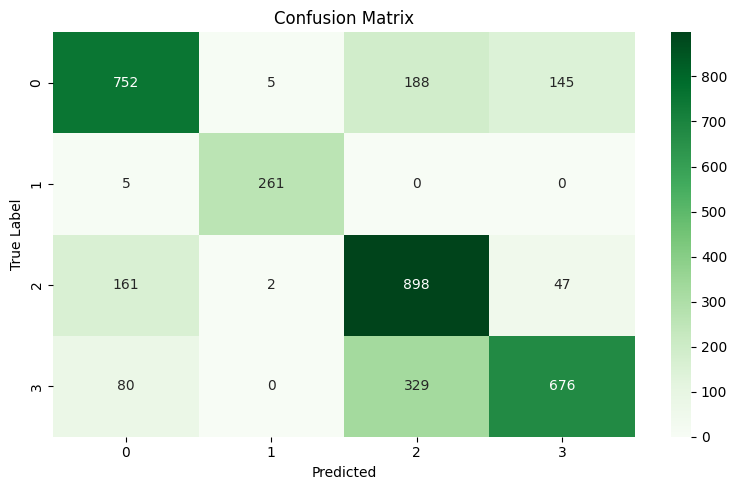

              precision    recall  f1-score   support

  anapaestic       0.75      0.69      0.72      1090
      dactyl       0.97      0.98      0.98       266
      iambic       0.63      0.81      0.71      1108
    trochaic       0.78      0.62      0.69      1085

    accuracy                           0.73      3549
   macro avg       0.79      0.78      0.78      3549
weighted avg       0.74      0.73      0.73      3549



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# confusion matrix
cm = confusion_matrix(y_test, predicted_log)

# plotting
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()  # Adjust layout
plt.show()

# Print the classification report
print(classification_report(y_test, predicted_log))


# 0: anapaestic
# 1: dactyl
# 2: iambic
# 3: trochaic


### Playground XGBoost

In [7]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/03/e6/4aef6799badc2693548559bad5b56d56cfe89eada337c815fdfe92175250/xgboost-2.0.3-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


# Splitting features and labels
X = D_pd['Stressed_Verse']
y = D_pd['Meter']

# Initialize and fit the LabelEncoder on the 'Meter' column
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# First split: Divide the data into Development (Dev) and Test sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Second split: Divide the Development set into Training (Train) and Validation (Val) sets
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=42)

# Create a model pipeline with CountVectorizer and XGBoost
model = make_pipeline(
    CountVectorizer(analyzer='char', ngram_range=(2, 3)),
    xgb.XGBClassifier()
)

# Train the model
model.fit(X_train, y_train)

# Predict and Evaluate
predicted = model.predict(X_test)
print(classification_report(y_test, predicted))


              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1090
           1       0.96      0.98      0.97       266
           2       0.64      0.83      0.72      1108
           3       0.93      0.59      0.72      1085

    accuracy                           0.76      3549
   macro avg       0.82      0.80      0.80      3549
weighted avg       0.79      0.76      0.76      3549



### Grid search XGBClassifier

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb


# Splitting features and labels
X = D_pd['Stressed_Verse']
y = D_pd['Meter']

# Initialize and fit the LabelEncoder on the 'Meter' column
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# First split: Divide the data into Development (Dev) and Test sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Second split: Divide the Development set into Training (Train) and Validation (Val) sets
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=42)

# Create a pipeline
pipeline = make_pipeline(
    CountVectorizer(analyzer='char'),
    xgb.XGBClassifier()
)

# Define the parameter grid
param_grid = {
    'countvectorizer__ngram_range': [(1, 1), (2, 2), (1, 2), (2, 3)],
    'xgbclassifier__max_depth': [5, 7],
    'xgbclassifier__n_estimators': [100, 200],
    'xgbclassifier__learning_rate': [0.01, 0.1]
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test set score:", test_score)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'countvectorizer__ngram_range': (2, 3), 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 7, 'xgbclassifier__n_estimators': 200}
Best score: 0.7559417566932832
Test set score: 0.7590870667793744


### XGBoost with best parameters :


> Best parameters: {'countvectorizer__ngram_range': (2, 3), 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 7, 'xgbclassifier__n_estimators': 200}
Best score: 0.7559417566932832
Test set score: 0.7590870667793744




In [ ]:
import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# Splitting features=X and labels=y
X = D_pd['Stressed_Verse']
y = D_pd['Meter']

# Initialize and fit the LabelEncoder on the 'Meter' column
le = LabelEncoder()
y_encoded = le.fit_transform(y)



# First split: Divide the data into Development (Dev) and Test sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Second split: Divide the Development set into Training (Train) and Validation (Val) sets
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=42)

# Fit and transform the training data with CountVectorizer
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 3))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_val_vectorized = vectorizer.transform(X_val)



#print("X_train_vectorized :", X_train_vectorized.shape)
#print("X_test_vectorized :", X_test_vectorized.shape)
#print("X_val_vectorized :", X_val_vectorized.shape)
#print("y_train :", y_train.shape)
#print("X_test :", X_test.shape)



# Transform the test data with the same vectorizer
X_test_vectorized = vectorizer.transform(X_test)


# Create and train XGBoost Classifier
#xgb_model = xgb.XGBClassifier(learning_rate=0.01, max_depth=7, n_estimators=200, early_stopping_rounds=10)
#xgb_model.fit(X_train_vectorized, y_train, eval_set=[(X_val_vectorized, y_val)])


# Assuming X_train, y_train, X_val, y_val are already defined
xgb_model = xgb.XGBClassifier(learning_rate=0.01, max_depth=7, n_estimators=400, early_stopping_rounds=10, eval_metric="mlogloss")
eval_set = [(X_train_vectorized, y_train), (X_val_vectorized, y_val)]

xgb_model.fit(X_train_vectorized, y_train, eval_set=eval_set, verbose=True)


# Predict and Evaluate
predicted = xgb_model.predict(X_test_vectorized)
print(classification_report(y_test, predicted))

# Plot the first decision tree
plt.figure(figsize=(50, 30))
xgb.plot_tree(xgb_model, num_trees=0, rankdir='LR')
plt.show()


NameError: name 'D_pd' is not defined

In [11]:
pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:


import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Splitting features=X and labels=y
X = D_pd['Stressed_Verse']
y = D_pd['Meter']

# Initialize and fit the OneHotEncoder on the 'Meter' column
#one_hot_encoder = OneHotEncoder(sparse=False)  # Initialize OneHotEncoder
#y_encoded = one_hot_encoder.fit_transform(np.array(y).reshape(-1, 1))  # Reshape y and transform

# Initialize and fit the OneHotEncoder on the 'Meter' column
one_hot_encoder = OneHotEncoder(sparse_output=False)  # Note: use sparse_output if your sklearn version supports it
y_encoded = one_hot_encoder.fit_transform(np.array(y).reshape(-1, 1))

# Convert one-hot encoded labels back to a single column for multi-class classification
y_encoded_single = y_encoded.argmax(axis=1)


# First split: Divide the data into Development (Dev) and Test sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y_encoded_single, test_size=0.2, random_state=42)

# Second split: Divide the Development set into Training (Train) and Validation (Val) sets
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=42)

# Fit and transform the training data with CountVectorizer
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 3))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_val_vectorized = vectorizer.transform(X_val)
X_test_vectorized = vectorizer.transform(X_test)  # Transform the test data with the same vectorizer

# Create and train XGBoost Classifier
xgb_model = xgb.XGBClassifier(learning_rate=0.01, max_depth=7, n_estimators=400, early_stopping_rounds=10, eval_metric="mlogloss")
eval_set = [(X_train_vectorized, y_train), (X_val_vectorized, y_val)]

xgb_model.fit(X_train_vectorized, y_train, eval_set=eval_set, verbose=True)

# Predict and Evaluate
predicted = xgb_model.predict(X_test_vectorized)
print(classification_report(y_test, predicted))


plt.show()


[0]	validation_0-mlogloss:1.37550	validation_1-mlogloss:1.37576
[1]	validation_0-mlogloss:1.36491	validation_1-mlogloss:1.36543
[2]	validation_0-mlogloss:1.35452	validation_1-mlogloss:1.35530
[3]	validation_0-mlogloss:1.34433	validation_1-mlogloss:1.34536
[4]	validation_0-mlogloss:1.33433	validation_1-mlogloss:1.33561
[5]	validation_0-mlogloss:1.32452	validation_1-mlogloss:1.32602
[6]	validation_0-mlogloss:1.31488	validation_1-mlogloss:1.31660
[7]	validation_0-mlogloss:1.30542	validation_1-mlogloss:1.30737
[8]	validation_0-mlogloss:1.29613	validation_1-mlogloss:1.29829
[9]	validation_0-mlogloss:1.28700	validation_1-mlogloss:1.28936
[10]	validation_0-mlogloss:1.27803	validation_1-mlogloss:1.28059
[11]	validation_0-mlogloss:1.26922	validation_1-mlogloss:1.27198
[12]	validation_0-mlogloss:1.26055	validation_1-mlogloss:1.26352
[13]	validation_0-mlogloss:1.25204	validation_1-mlogloss:1.25520
[14]	validation_0-mlogloss:1.24367	validation_1-mlogloss:1.24701
[15]	validation_0-mlogloss:1.23543	

[126]	validation_0-mlogloss:0.77650	validation_1-mlogloss:0.79023
[127]	validation_0-mlogloss:0.77459	validation_1-mlogloss:0.78837
[128]	validation_0-mlogloss:0.77270	validation_1-mlogloss:0.78652
[129]	validation_0-mlogloss:0.77084	validation_1-mlogloss:0.78470
[130]	validation_0-mlogloss:0.76899	validation_1-mlogloss:0.78289
[131]	validation_0-mlogloss:0.76717	validation_1-mlogloss:0.78111
[132]	validation_0-mlogloss:0.76537	validation_1-mlogloss:0.77934
[133]	validation_0-mlogloss:0.76358	validation_1-mlogloss:0.77760
[134]	validation_0-mlogloss:0.76182	validation_1-mlogloss:0.77588
[135]	validation_0-mlogloss:0.76007	validation_1-mlogloss:0.77417
[136]	validation_0-mlogloss:0.75835	validation_1-mlogloss:0.77249
[137]	validation_0-mlogloss:0.75664	validation_1-mlogloss:0.77083
[138]	validation_0-mlogloss:0.75495	validation_1-mlogloss:0.76918
[139]	validation_0-mlogloss:0.75329	validation_1-mlogloss:0.76755
[140]	validation_0-mlogloss:0.75164	validation_1-mlogloss:0.76594
[141]	vali

[251]	validation_0-mlogloss:0.64272	validation_1-mlogloss:0.66025
[252]	validation_0-mlogloss:0.64219	validation_1-mlogloss:0.65974
[253]	validation_0-mlogloss:0.64167	validation_1-mlogloss:0.65923
[254]	validation_0-mlogloss:0.64116	validation_1-mlogloss:0.65873
[255]	validation_0-mlogloss:0.64064	validation_1-mlogloss:0.65824
[256]	validation_0-mlogloss:0.64014	validation_1-mlogloss:0.65775
[257]	validation_0-mlogloss:0.63963	validation_1-mlogloss:0.65726
[258]	validation_0-mlogloss:0.63913	validation_1-mlogloss:0.65679
[259]	validation_0-mlogloss:0.63864	validation_1-mlogloss:0.65631
[260]	validation_0-mlogloss:0.63815	validation_1-mlogloss:0.65584
[261]	validation_0-mlogloss:0.63767	validation_1-mlogloss:0.65537
[262]	validation_0-mlogloss:0.63719	validation_1-mlogloss:0.65491
[263]	validation_0-mlogloss:0.63672	validation_1-mlogloss:0.65445
[264]	validation_0-mlogloss:0.63625	validation_1-mlogloss:0.65400
[265]	validation_0-mlogloss:0.63578	validation_1-mlogloss:0.65355
[266]	vali

[376]	validation_0-mlogloss:0.60267	validation_1-mlogloss:0.62193
[377]	validation_0-mlogloss:0.60248	validation_1-mlogloss:0.62176
[378]	validation_0-mlogloss:0.60229	validation_1-mlogloss:0.62158
[379]	validation_0-mlogloss:0.60211	validation_1-mlogloss:0.62141
[380]	validation_0-mlogloss:0.60192	validation_1-mlogloss:0.62124
[381]	validation_0-mlogloss:0.60174	validation_1-mlogloss:0.62107
[382]	validation_0-mlogloss:0.60156	validation_1-mlogloss:0.62090
[383]	validation_0-mlogloss:0.60138	validation_1-mlogloss:0.62074
[384]	validation_0-mlogloss:0.60120	validation_1-mlogloss:0.62057
[385]	validation_0-mlogloss:0.60103	validation_1-mlogloss:0.62040
[386]	validation_0-mlogloss:0.60085	validation_1-mlogloss:0.62024
[387]	validation_0-mlogloss:0.60068	validation_1-mlogloss:0.62008
[388]	validation_0-mlogloss:0.60051	validation_1-mlogloss:0.61992
[389]	validation_0-mlogloss:0.60034	validation_1-mlogloss:0.61976
[390]	validation_0-mlogloss:0.60017	validation_1-mlogloss:0.61960
[391]	vali

ImportError: You must install graphviz to plot tree

<Figure size 1000x1000 with 0 Axes>

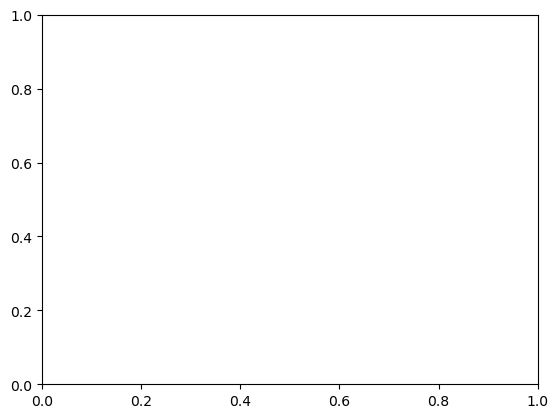

In [10]:
plt.figure(figsize=(10, 10))
xgb.plot_tree(xgb_model, num_trees=0, rankdir='LR')
plt.savefig("tree_high_res.png", dpi=300)  # Save as high-resolution image file
plt.show()
plt.close()


In [ ]:
feature_names = vectorizer.get_feature_names_out()
feature_names


array(['ss', 'ssw', 'sw', 'sws', 'sww', 'ws', 'wss', 'wsw', 'ww', 'wws'],
      dtype=object)

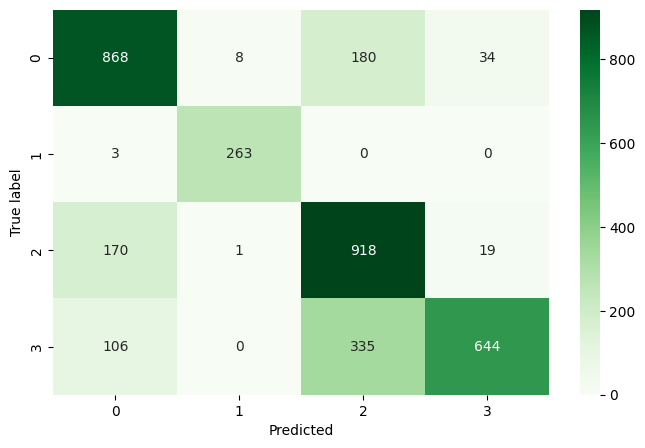

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1090
           1       0.97      0.99      0.98       266
           2       0.64      0.83      0.72      1108
           3       0.92      0.59      0.72      1085

    accuracy                           0.76      3549
   macro avg       0.82      0.80      0.80      3549
weighted avg       0.79      0.76      0.76      3549



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a trained model and test data (X_test, y_test)
# For example, using model.predict(X_test) to get the predictions


# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted)

# Plotting the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('True label')
plt.show()

# For a more detailed classification report
print(classification_report(y_test, predicted))


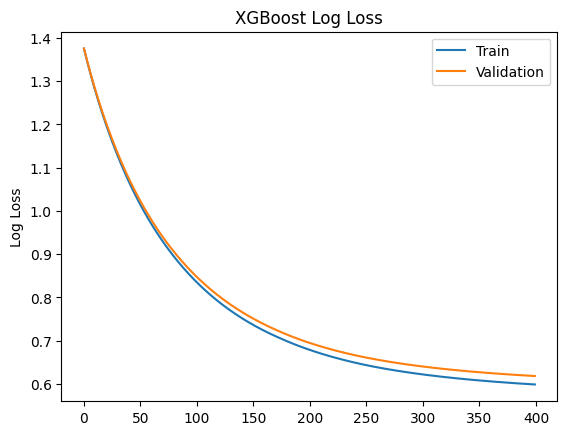

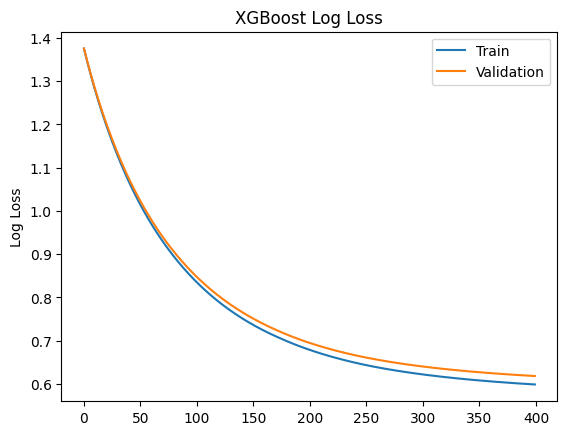

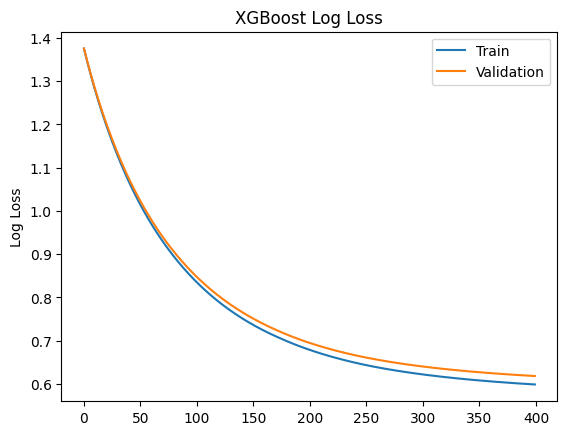

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt


# Extract evaluation results
results = xgb_model.evals_result()

# Plotting
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Validation')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# If you have accuracy in your eval_metric, you can also plot it
if 'accuracy' in results['validation_0']:
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['accuracy'], label='Train')
    ax.plot(x_axis, results['validation_1']['accuracy'], label='Validation')
    ax.legend()
    plt.ylabel('Accuracy')
    plt.title('XGBoost Accuracy')
    plt.show()



# Extract evaluation results
results = xgb_model.evals_result()

# Plotting
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Validation')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# If you have accuracy in your eval_metric, you can also plot it
if 'accuracy' in results['validation_0']:
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['accuracy'], label='Train')
    ax.plot(x_axis, results['validation_1']['accuracy'], label='Validation')
    ax.legend()
    plt.ylabel('Accuracy')
    plt.title('XGBoost Accuracy')
    plt.show()


# Extract evaluation results
results = xgb_model.evals_result()

# Plotting
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Validation')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# If you have accuracy in your eval_metric, you can also plot it
if 'accuracy' in results['validation_0']:
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['accuracy'], label='Train')
    ax.plot(x_axis, results['validation_1']['accuracy'], label='Validation')
    ax.legend()
    plt.ylabel('Accuracy')
    plt.title('XGBoost Accuracy')
    plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a trained model and test data (X_test, y_test)
# For example, using model.predict(X_test) to get the predictions


# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted)

# Plotting the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('True label')
plt.show()

# For a more detailed classification report
print(classification_report(y_test, predicted))


## **Model 2**

### Convolution

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, GlobalMaxPooling1D, Concatenate, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense



#### Loading pre-processed data

In [ ]:
#loading prepocessed data
# Define the file path (same as used for saving the DataFrame)
file_path = 'D_pd.csv'

# Read the DataFrame from the CSV file
D_pd = pd.read_csv(file_path)


In [ ]:
y = D_pd['Meter'].values
X = D_pd['Stressed_Verse']
print("y :", y.shape)
print("X :", X.shape)

y : (17743,)
X : (17743,)


In [ ]:
X[7000]

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

#### Building the model

In [ ]:
# Splitting data

# Pocessing data

# 1DConvulution needs fixed lenghts
# Encode sequences: 'w' -> 0, 's' -> 1
D_pd['Encoded_Verse'] = D_pd['Stressed_Verse'].apply(lambda x: [0 if char == 'w' else 1 for char in x])

# Pad the sequences to have the same length
max_length = max(D_pd['Encoded_Verse'].apply(len))
X = pad_sequences(D_pd['Encoded_Verse'].tolist(), maxlen=max_length, padding='post')


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Meter' column to encode labels
y_encoded = label_encoder.fit_transform(D_pd['Meter'])
num_classes = len(label_encoder.classes_)  # Number of unique classes

# Convert labels to one-hot encoding
y = to_categorical(y_encoded, num_classes)

# First split: Divide the data into Development (Dev) and Test sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Divide the Development set into Training (Train) and Validation (Val) sets
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=42)



# Reshape X for Conv1D input
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]

#print("X_train :", X_train.shape)
#print("y_train :", y_train.shape)
#print("X_test :", X_test.shape)
#print("X_test :", X_test.shape)
#print("X_test :", X_test.shape)


# Defining the model
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    Conv1D(filters=64, kernel_size=2, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(num_classes, activation='softmax')
])


# Compile the model and the metrics

# Different optimizers - uncomment the one you want to use
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
# optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
# optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
# optimizer = tf.keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
# optimizer = tf.keras.optimizers.Adamax(learning_rate=0.002)
# optimizer = tf.keras.optimizers.Nadam(learning_rate=0.002)
# optimizer = tf.keras.optimizers.Ftrl(learning_rate=0.001)


model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',  # For classification accuracy
        tf.keras.metrics.Precision(),
        tf.keras.metrics.MeanSquaredError(),
        tf.keras.metrics.MeanAbsoluteError()
    ]
)
num_epochs=10

# Train the model
#history = model.fit(X_train, y_train, epochs=num_epochs, validation_split=0.1)

history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val))

# Evaluate the model
evaluation_results = model.evaluate(X_test, y_test)

# Unpack the results
test_loss, test_accuracy, test_precision, test_mse, test_mae = evaluation_results

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")


# Model Summary
model.summary()


Epoch 1/10
333/333 [==============================] - 9s 10ms/step - loss: 1.2517 - accuracy: 0.3769 - precision: 0.5604 - mean_squared_error: 0.1732 - mean_absolute_error: 0.3495 - val_loss: 1.1666 - val_accuracy: 0.4193 - val_precision: 0.5753 - val_mean_squared_error: 0.1642 - val_mean_absolute_error: 0.3325
Epoch 2/10
333/333 [==============================] - 2s 6ms/step - loss: 1.0617 - accuracy: 0.4771 - precision: 0.6649 - mean_squared_error: 0.1525 - mean_absolute_error: 0.3082 - val_loss: 0.9767 - val_accuracy: 0.5280 - val_precision: 0.7523 - val_mean_squared_error: 0.1423 - val_mean_absolute_error: 0.2884
Epoch 3/10
333/333 [==============================] - 3s 8ms/step - loss: 0.9835 - accuracy: 0.5043 - precision: 0.6848 - mean_squared_error: 0.1438 - mean_absolute_error: 0.2859 - val_loss: 0.9710 - val_accuracy: 0.5272 - val_precision: 0.7618 - val_mean_squared_error: 0.1418 - val_mean_absolute_error: 0.2877
Epoch 4/10
333/333 [==============================] - 3s 8ms/st

111/111 [==============================] - 0s 2ms/step
Shape of predictions: (3549, 4)


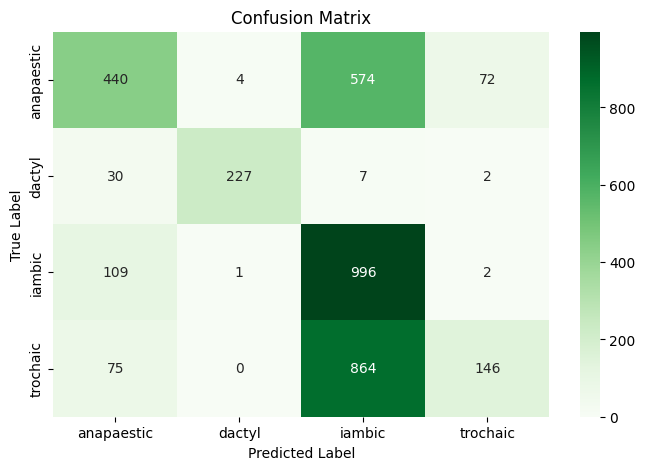

111/111 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

  anapaestic       0.67      0.40      0.50      1090
      dactyl       0.98      0.85      0.91       266
      iambic       0.41      0.90      0.56      1108
    trochaic       0.66      0.13      0.22      1085

    accuracy                           0.51      3549
   macro avg       0.68      0.57      0.55      3549
weighted avg       0.61      0.51      0.47      3549



In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Check the shape of y_pred to understand its structure
print("Shape of predictions:", y_pred.shape)

# Assuming y_pred is of shape (num_samples, 4), as there are 4 classes
y_pred_label = np.argmax(y_pred, axis=1)

# Convert true labels from one-hot encoded to label encoded
y_true_label = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true_label, y_pred_label)

# Plot the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


from sklearn.metrics import classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Convert predictions from one-hot encoded to class indices
y_pred_label = np.argmax(y_pred, axis=1)

# Convert true labels from one-hot encoded to class indices
y_true_label = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(y_true_label, y_pred_label, target_names=label_encoder.classes_)
print(report)




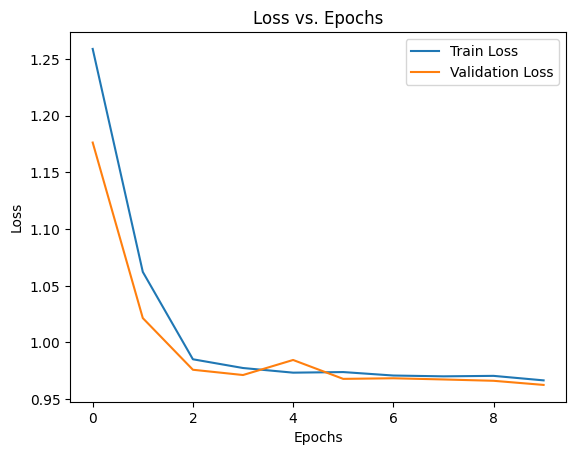

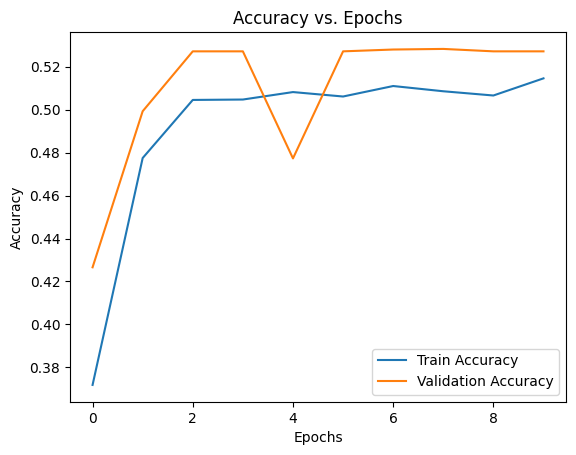

In [ ]:

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy
# Note: Replace 'accuracy' with 'acc' if you get a key error
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



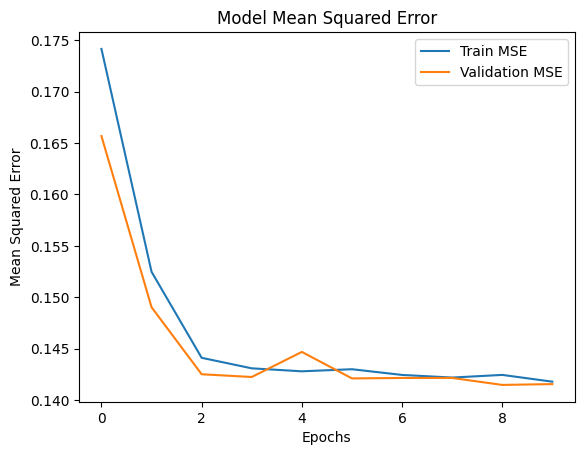

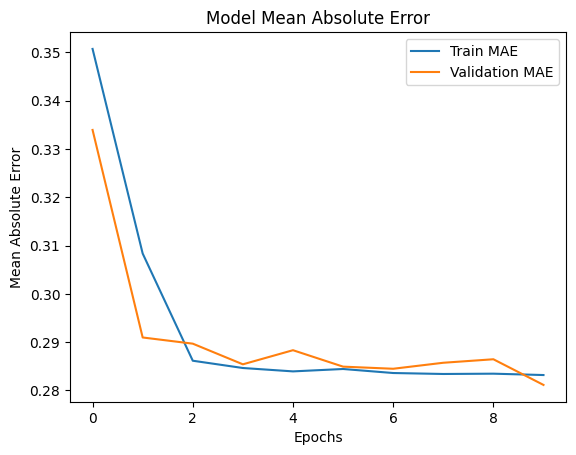

In [ ]:
# Plotting Mean Squared Error
#plt.figure(figsize=(10, 5))
plt.plot(history.history['mean_squared_error'], label='Train MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Plotting Mean Absolute Error
#plt.figure(figsize=(10, 5))
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

### Experimenting with different runs

Epoch 1/20
400/400 [==============================] - 3s 5ms/step - loss: 1.2830 - accuracy: 0.4173 - val_loss: 1.2411 - val_accuracy: 0.4775
Epoch 2/20
400/400 [==============================] - 2s 4ms/step - loss: 1.2273 - accuracy: 0.4688 - val_loss: 1.1988 - val_accuracy: 0.4775
Epoch 3/20
400/400 [==============================] - 2s 5ms/step - loss: 1.1964 - accuracy: 0.4712 - val_loss: 1.1869 - val_accuracy: 0.4775
Epoch 4/20
400/400 [==============================] - 3s 6ms/step - loss: 1.1847 - accuracy: 0.4712 - val_loss: 1.1797 - val_accuracy: 0.4775
Epoch 5/20
400/400 [==============================] - 2s 5ms/step - loss: 1.1804 - accuracy: 0.4712 - val_loss: 1.1761 - val_accuracy: 0.4775
Epoch 6/20
400/400 [==============================] - 2s 4ms/step - loss: 1.1786 - accuracy: 0.4712 - val_loss: 1.1755 - val_accuracy: 0.4775
Epoch 7/20
400/400 [==============================] - 2s 4ms/step - loss: 1.1780 - accuracy: 0.4712 - val_loss: 1.1733 - val_accuracy: 0.4775
Epoch 

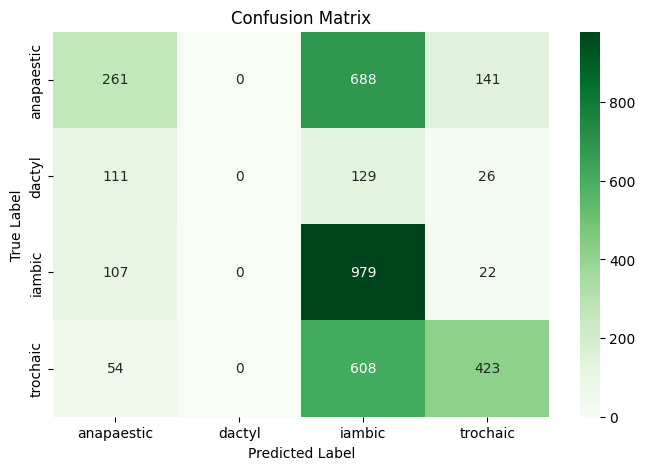

111/111 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

  anapaestic       0.49      0.24      0.32      1090
      dactyl       0.00      0.00      0.00       266
      iambic       0.41      0.88      0.56      1108
    trochaic       0.69      0.39      0.50      1085

    accuracy                           0.47      3549
   macro avg       0.40      0.38      0.34      3549
weighted avg       0.49      0.47      0.43      3549



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Splitting data

# First split: Divide the data into Development (Dev) and Test sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Second split: Divide the Development set into Training (Train) and Validation (Val) sets
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=42)


# Encode sequences: 'w' -> 0, 's' -> 1
D_pd['Encoded_Verse'] = D_pd['Stressed_Verse'].apply(lambda x: [0 if char == 'w' else 1 for char in x])

# Pad the sequences to have the same length
max_length = max(D_pd['Encoded_Verse'].apply(len))
X = pad_sequences(D_pd['Encoded_Verse'].tolist(), maxlen=max_length, padding='post')

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Meter' column to encode labels
y_encoded = label_encoder.fit_transform(D_pd['Meter'])
num_classes = len(label_encoder.classes_)  # Number of unique classes

# Convert labels to one-hot encoding
y = to_categorical(y_encoded, num_classes)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape X for Conv1D input
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

#print("X_train :", X_train.shape)
#print("y_train :", y_train.shape)
#print("X_test :", X_test.shape)
# Reshape X for Conv1D input
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Input layer
input_layer = Input(shape=(X_train.shape[1], 1))

# Convolutional branches with different kernel sizes and same padding
conv_branch1 = Conv1D(filters=32, kernel_size=1, activation='relu', padding='same')(input_layer)
conv_branch2 = Conv1D(filters=32, kernel_size=2, activation='relu', padding='same')(input_layer)
conv_branch3 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)

# Concatenate the outputs of the branches
concatenated = Concatenate()([conv_branch1, conv_branch2, conv_branch3])

# Add pooling and dense layers
pooled = GlobalMaxPooling1D()(concatenated)
output_layer = Dense(num_classes, activation='softmax')(pooled)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Model Summary
model.summary()





##### model with kernel regulization and dropout

Epoch 1/10
300/300 [==============================] - 3s 5ms/step - loss: 1.2283 - accuracy: 0.3972 - val_loss: 1.1395 - val_accuracy: 0.4085
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 1.1317 - accuracy: 0.4399 - val_loss: 1.0844 - val_accuracy: 0.4282
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 1.0823 - accuracy: 0.4737 - val_loss: 1.0566 - val_accuracy: 0.4826
Epoch 4/10
300/300 [==============================] - 1s 5ms/step - loss: 1.0682 - accuracy: 0.4762 - val_loss: 1.0509 - val_accuracy: 0.4826
Epoch 5/10
300/300 [==============================] - 1s 5ms/step - loss: 1.0629 - accuracy: 0.4805 - val_loss: 1.0519 - val_accuracy: 0.4826
Epoch 6/10
300/300 [==============================] - 2s 6ms/step - loss: 1.0622 - accuracy: 0.4762 - val_loss: 1.0523 - val_accuracy: 0.4826
Epoch 7/10
300/300 [==============================] - 2s 6ms/step - loss: 1.0611 - accuracy: 0.4819 - val_loss: 1.0430 - val_accuracy: 0.4826
Epoch 

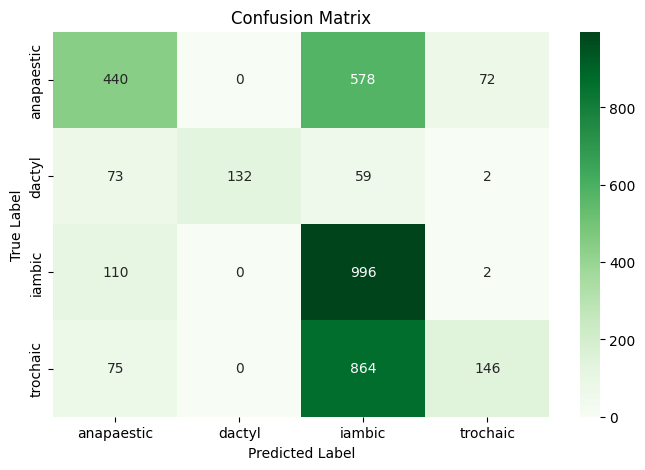

111/111 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

  anapaestic       0.63      0.40      0.49      1090
      dactyl       1.00      0.50      0.66       266
      iambic       0.40      0.90      0.55      1108
    trochaic       0.66      0.13      0.22      1085

    accuracy                           0.48      3549
   macro avg       0.67      0.48      0.48      3549
weighted avg       0.59      0.48      0.44      3549



In [ ]:
# Splitting data



# Encode sequences: 'w' -> 0, 's' -> 1
D_pd['Encoded_Verse'] = D_pd['Stressed_Verse'].apply(lambda x: [0 if char == 'w' else 1 for char in x])

# Pad the sequences to have the same length
max_length = max(D_pd['Encoded_Verse'].apply(len))
X = pad_sequences(D_pd['Encoded_Verse'].tolist(), maxlen=max_length, padding='post')

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Meter' column to encode labels
y_encoded = label_encoder.fit_transform(D_pd['Meter'])
num_classes = len(label_encoder.classes_)  # Number of unique classes

# Convert labels to one-hot encoding
y = to_categorical(y_encoded, num_classes)

# Train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# First split: Divide the data into Development (Dev) and Test sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Divide the Development set into Training (Train) and Validation (Val) sets
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=42)

# Reshape X for Conv1D input
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

#print("X_train :", X_train.shape)
#print("y_train :", y_train.shape)
#print("X_test :", X_test.shape)


# Defining the model
model = Sequential([
    Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),

    Conv1D(filters=32, kernel_size=2, activation='relu'),

    Conv1D(filters=32, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)


# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Model Summary
model.summary()

# Predict on the test set
y_pred = model.predict(X_test)

# Check the shape of y_pred to understand its structure
print("Shape of predictions:", y_pred.shape)

# Assuming y_pred is of shape (num_samples, 4), as there are 4 classes
y_pred_label = np.argmax(y_pred, axis=1)

# Convert true labels from one-hot encoded to label encoded
y_true_label = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true_label, y_pred_label)

# Plot the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


from sklearn.metrics import classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Convert predictions from one-hot encoded to class indices
y_pred_label = np.argmax(y_pred, axis=1)

# Convert true labels from one-hot encoded to class indices
y_true_label = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(y_true_label, y_pred_label, target_names=label_encoder.classes_)
print(report)


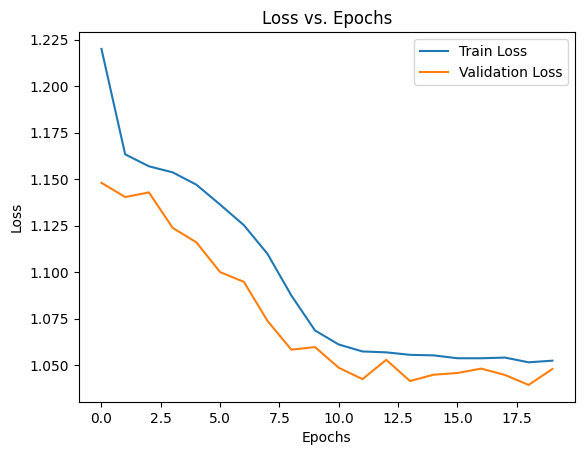

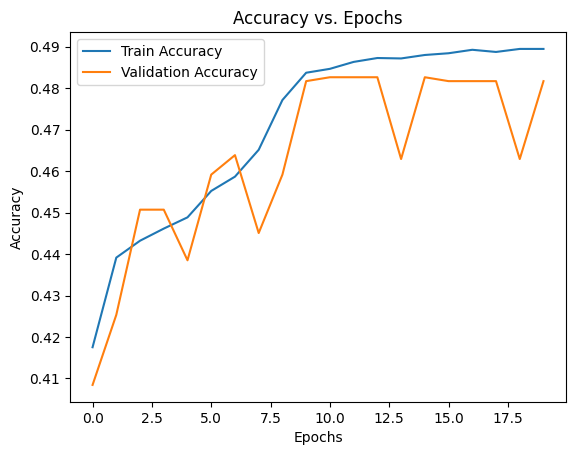

In [ ]:
# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy
# Note: Replace 'accuracy' with 'acc' if you get a key error
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#test

# Initialize and fit the LabelEncoder on the 'Meter' column
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# First split: Divide the data into Development (Dev) and Test sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Second split: Divide the Development set into Training (Train) and Validation (Val) sets
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=42)


print("X_train :", X_train.shape)
print("X_val :", X_val.shape)
print("X_test :", X_test.shape)
print()
print("y_train :", y_train.shape)
print("y_val :", y_val.shape)
print("y_test :", y_test.shape)

X_train : (10645,)
X_val : (3549,)
X_test : (3549,)

y_train : (10645,)
y_val : (3549,)
y_test : (3549,)


In [ ]:
### Baseline 0.31

from sklearn.dummy import DummyClassifier

dummy1 = DummyClassifier(strategy="most_frequent")

dummy1.fit(X_train, y_train)
dummy1.score(X_train, y_train)

In [17]:
# swap labelEncoder with OneHotEncoder 

import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Splitting features=X and labels=y
X = D_pd['Stressed_Verse']
y = D_pd['Meter']

# Initialize and fit the OneHotEncoder on the 'Meter' column
#one_hot_encoder = OneHotEncoder(sparse=False)  # Initialize OneHotEncoder
#y_encoded = one_hot_encoder.fit_transform(np.array(y).reshape(-1, 1))  # Reshape y and transform

# Initialize and fit the OneHotEncoder on the 'Meter' column
one_hot_encoder = OneHotEncoder(sparse_output=False)  # Note: use sparse_output if your sklearn version supports it
y_encoded = one_hot_encoder.fit_transform(np.array(y).reshape(-1, 1))

# Convert one-hot encoded labels back to a single column for multi-class classification
y_encoded_single = y_encoded.argmax(axis=1)


# First split: Divide the data into Development (Dev) and Test sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y_encoded_single, test_size=0.2, random_state=42)

# Second split: Divide the Development set into Training (Train) and Validation (Val) sets
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=42)

# Fit and transform the training data with CountVectorizer
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 3))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_val_vectorized = vectorizer.transform(X_val)
X_test_vectorized = vectorizer.transform(X_test)  # Transform the test data with the same vectorizer

# Create and train XGBoost Classifier
xgb_model = xgb.XGBClassifier(learning_rate=0.01, max_depth=7, n_estimators=400, early_stopping_rounds=10, eval_metric="mlogloss")
eval_set = [(X_train_vectorized, y_train), (X_val_vectorized, y_val)]

xgb_model.fit(X_train_vectorized, y_train, eval_set=eval_set, verbose=True)

# Predict and Evaluate
predicted = xgb_model.predict(X_test_vectorized)
print(classification_report(y_test, predicted))


plt.show()


[0]	validation_0-mlogloss:1.37550	validation_1-mlogloss:1.37576
[1]	validation_0-mlogloss:1.36491	validation_1-mlogloss:1.36543
[2]	validation_0-mlogloss:1.35452	validation_1-mlogloss:1.35530
[3]	validation_0-mlogloss:1.34433	validation_1-mlogloss:1.34536
[4]	validation_0-mlogloss:1.33433	validation_1-mlogloss:1.33561
[5]	validation_0-mlogloss:1.32452	validation_1-mlogloss:1.32602
[6]	validation_0-mlogloss:1.31488	validation_1-mlogloss:1.31660
[7]	validation_0-mlogloss:1.30542	validation_1-mlogloss:1.30737
[8]	validation_0-mlogloss:1.29613	validation_1-mlogloss:1.29829
[9]	validation_0-mlogloss:1.28700	validation_1-mlogloss:1.28936
[10]	validation_0-mlogloss:1.27803	validation_1-mlogloss:1.28059
[11]	validation_0-mlogloss:1.26922	validation_1-mlogloss:1.27198
[12]	validation_0-mlogloss:1.26055	validation_1-mlogloss:1.26352
[13]	validation_0-mlogloss:1.25204	validation_1-mlogloss:1.25520
[14]	validation_0-mlogloss:1.24367	validation_1-mlogloss:1.24701
[15]	validation_0-mlogloss:1.23543	

[126]	validation_0-mlogloss:0.77650	validation_1-mlogloss:0.79023
[127]	validation_0-mlogloss:0.77459	validation_1-mlogloss:0.78837
[128]	validation_0-mlogloss:0.77270	validation_1-mlogloss:0.78652
[129]	validation_0-mlogloss:0.77084	validation_1-mlogloss:0.78470
[130]	validation_0-mlogloss:0.76899	validation_1-mlogloss:0.78289
[131]	validation_0-mlogloss:0.76717	validation_1-mlogloss:0.78111
[132]	validation_0-mlogloss:0.76537	validation_1-mlogloss:0.77934
[133]	validation_0-mlogloss:0.76358	validation_1-mlogloss:0.77760
[134]	validation_0-mlogloss:0.76182	validation_1-mlogloss:0.77588
[135]	validation_0-mlogloss:0.76007	validation_1-mlogloss:0.77417
[136]	validation_0-mlogloss:0.75835	validation_1-mlogloss:0.77249
[137]	validation_0-mlogloss:0.75664	validation_1-mlogloss:0.77083
[138]	validation_0-mlogloss:0.75495	validation_1-mlogloss:0.76918
[139]	validation_0-mlogloss:0.75329	validation_1-mlogloss:0.76755
[140]	validation_0-mlogloss:0.75164	validation_1-mlogloss:0.76594
[141]	vali

[251]	validation_0-mlogloss:0.64272	validation_1-mlogloss:0.66025
[252]	validation_0-mlogloss:0.64219	validation_1-mlogloss:0.65974
[253]	validation_0-mlogloss:0.64167	validation_1-mlogloss:0.65923
[254]	validation_0-mlogloss:0.64116	validation_1-mlogloss:0.65873
[255]	validation_0-mlogloss:0.64064	validation_1-mlogloss:0.65824
[256]	validation_0-mlogloss:0.64014	validation_1-mlogloss:0.65775
[257]	validation_0-mlogloss:0.63963	validation_1-mlogloss:0.65726
[258]	validation_0-mlogloss:0.63913	validation_1-mlogloss:0.65679
[259]	validation_0-mlogloss:0.63864	validation_1-mlogloss:0.65631
[260]	validation_0-mlogloss:0.63815	validation_1-mlogloss:0.65584
[261]	validation_0-mlogloss:0.63767	validation_1-mlogloss:0.65537
[262]	validation_0-mlogloss:0.63719	validation_1-mlogloss:0.65491
[263]	validation_0-mlogloss:0.63672	validation_1-mlogloss:0.65445
[264]	validation_0-mlogloss:0.63625	validation_1-mlogloss:0.65400
[265]	validation_0-mlogloss:0.63578	validation_1-mlogloss:0.65355
[266]	vali

[376]	validation_0-mlogloss:0.60267	validation_1-mlogloss:0.62193
[377]	validation_0-mlogloss:0.60248	validation_1-mlogloss:0.62176
[378]	validation_0-mlogloss:0.60229	validation_1-mlogloss:0.62158
[379]	validation_0-mlogloss:0.60211	validation_1-mlogloss:0.62141
[380]	validation_0-mlogloss:0.60192	validation_1-mlogloss:0.62124
[381]	validation_0-mlogloss:0.60174	validation_1-mlogloss:0.62107
[382]	validation_0-mlogloss:0.60156	validation_1-mlogloss:0.62090
[383]	validation_0-mlogloss:0.60138	validation_1-mlogloss:0.62074
[384]	validation_0-mlogloss:0.60120	validation_1-mlogloss:0.62057
[385]	validation_0-mlogloss:0.60103	validation_1-mlogloss:0.62040
[386]	validation_0-mlogloss:0.60085	validation_1-mlogloss:0.62024
[387]	validation_0-mlogloss:0.60068	validation_1-mlogloss:0.62008
[388]	validation_0-mlogloss:0.60051	validation_1-mlogloss:0.61992
[389]	validation_0-mlogloss:0.60034	validation_1-mlogloss:0.61976
[390]	validation_0-mlogloss:0.60017	validation_1-mlogloss:0.61960
[391]	vali